In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA
import tifffile as tif
import skimage
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython import display
skimage.__version__

'0.13.1'

In [18]:
#zebra3d = tif.imread('/Users/nick.antipa/Documents/Diffusers/Miniscope/zebrafish_data/zebrafish_confocal-1_z3_3d.tif')
zebra3d = tif.imread('/Users/nick.antipa/Documents/Diffusers/Miniscope/zebrafish_data/zebrafishBright3.tif');


/Users/nick.antipa/anaconda/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [46]:
zebra_ds = rescale(np.moveaxis(zebra3d,0,2),1.0/8.0)

/Users/nick.antipa/anaconda/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


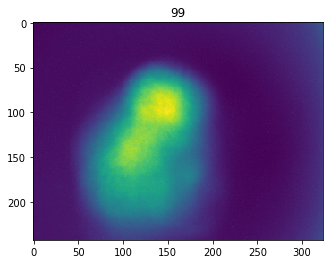

In [47]:
zebra_ds = zebra_ds[:,:,:100]
f = plt.figure()
for n in range(np.shape(zebra_ds)[-1]):
    plt.imshow(zebra_ds[:,:,n])
    plt.title('{}'.format(n))
    display.display(f)
    display.clear_output(wait=True)

In [30]:
vec2im = lambda vec: np.reshape(vec,[np.shape(zebra_ds)[0],np.shape(zebra_ds)[1]])
im2vec = lambda im:np.ravel(im)

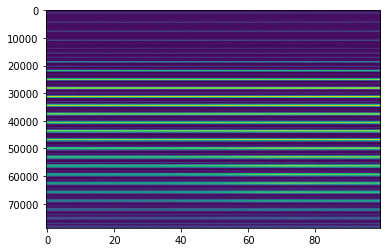

In [76]:
data_real = True

if data_real is True:
    ncomps = 50
    X = []
    nobs = np.shape(zebra_ds)[2]
    for n in range(nobs):
        X.append(im2vec(zebra_ds[:,:,n]))
    X = np.array(X).T
else:
    nobs = 151
    nx = 100000
    ncomps = 75
    t = np.linspace(0,np.pi,nobs)
    x = np.linspace(0,np.pi*2, nx)
    a1 = np.random.rand(1,nx)
    a2 = np.random.rand(1,nx)

    v = []
    a = []
    for n in range(ncomps):
        v.append(np.sin(np.random.randn(1)*25*x))
        a.append(np.random.randn(nobs))

    v = np.array(v).T
    a = np.array(a)
    X = np.dot(v,a)

#X = np.dot(np.atleast_2d(v1).T,a1) + np.dot(np.atleast_2d(v2).T,a2)
plt.imshow(X,aspect='auto')


In [77]:
ica = FastICA(n_components = ncomps)
ica.max_iter = 1000
ica.tol = .0000000001


In [78]:
S_ = ica.fit_transform(X)
ica.n_iter_

/Users/nick.antipa/anaconda/anaconda/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


1000

In [80]:
A_ = ica.mixing_

In [81]:
np.allclose(X, np.dot(S_, A_.T)+ica.mean_)

False

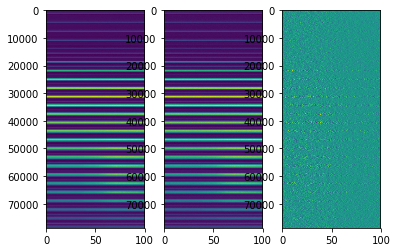

In [82]:
plt.subplot(1,3,1)
plt.imshow(np.dot(S_,A_.T) + ica.mean_, aspect='auto')
plt.subplot(1,3,2)
plt.imshow(X, aspect='auto')
plt.subplot(1,3,3)
plt.imshow(np.dot(S_,A_.T) + ica.mean_ - X, aspect='auto')

In [83]:
np.shape(A_)

(100, 50)

KeyboardInterrupt: 

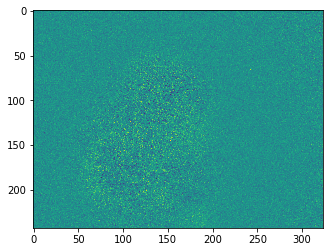

In [84]:
f = plt.figure()
for n in range(ncomps):
    plt.imshow(vec2im(S_[:,n]))
    display.display(f)
    display.clear_output(wait=True)

(78732, 50)


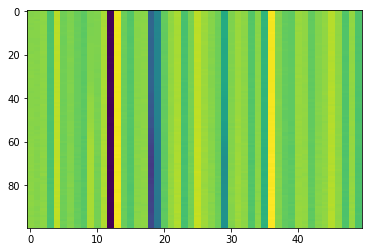

In [85]:
# Find strongest spike in activity and make positive
max_inds = np.argmax(np.abs(A_), axis=0)
A_sign = np.array([np.sign(A_[max_inds[n],n]) for n in range(np.shape(A_)[1])])
A_rect = np.multiply(A_,A_sign)
S_rect = np.multiply(S_, A_sign)
print(np.shape(S_rect))
plt.imshow(A_, aspect='auto')

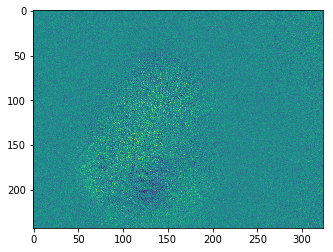

In [86]:
f = plt.figure()
for n in range(ncomps):
    plt.imshow(vec2im(S_rect[:,n]))
    display.display(f)
    display.clear_output(wait=True)

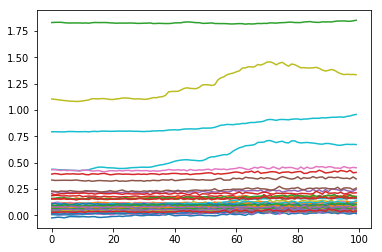

In [87]:
f = plt.figure()
k = 33
for n in range(ncomps-5):
    #plt.imshow((vec2im(S_rect[:,k])*A_rect[n,k]),vmin = 0, vmax = np.max(S_rect[:,k])*np.max(A_rect[:,k]))
    plt.plot(A_rect[:,n])
    display.display(f)
    display.clear_output(wait=True)

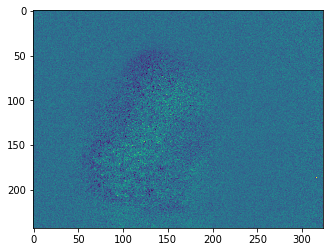

In [91]:
plt.imshow(vec2im(S_rect[:,10]))